In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Checkpoints Part 1

In [2]:
# loading the data
companies=pd.read_csv('companies.txt',sep='\t',encoding="ISO-8859-1") # using ISO because file is having special characters so to read those values
companies.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [4]:
# load the file for rounds2
rounds2=pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
rounds2.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
# Here we have succefully read two data frames for companies and rounds 2

In [6]:
companies.shape

(66368, 10)

In [7]:
rounds2.shape

(114949, 6)

In [8]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [9]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [10]:
# checking for null values
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [11]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

## Lets Drop the unecessarry columns  from the dataframes

In [12]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [13]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [14]:
companies.drop(['homepage_url','founded_at','state_code','region','city'],axis=1,inplace=True)

In [15]:
rounds2.drop(['funding_round_permalink','funded_at','funding_round_code'],axis=1,inplace=True)

In [16]:
rounds2.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/ORGANIZATION/-QOUNTER,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [17]:
# unique companies in Rounds2 -
rounds2.company_permalink.nunique()

90247

In [18]:
# converting all the strings present in permalink into lower case.
# for i in range(len(rounds2['company_permalink'])):
#     rounds2['company_permalink'][i]=rounds2['company_permalink'][i].lower()

rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()  # --- easy way

In [19]:
''' after converting strings to lowercase we
can see unique permalinks available are descreased to 
66370 now from 90247'''

rounds2.company_permalink.nunique()

66370

### 66370 unique companies present in rounds2

In [20]:
# now checking same for companies dataframe

In [21]:
companies.head()

,permalink,name,category_list,status,country_code
0,/Organization/-Fame,#fame,Media,operating,IND
1,/Organization/-Qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
3,/Organization/0-6-Com,0-6.com,Curated Web,operating,CHN
4,/Organization/004-Technologies,004 Technologies,Software,operating,USA


In [22]:
# converting all the permalink strings to lowercase
# for i in range(len(companies['permalink'])):
#     companies['permalink'][i]=companies['permalink'][i].lower()
companies['permalink']=companies['permalink'].str.lower()

In [23]:
companies.head()

,permalink,name,category_list,status,country_code
0,/organization/-fame,#fame,Media,operating,IND
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
3,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
4,/organization/004-technologies,004 Technologies,Software,operating,USA


In [24]:
companies.permalink.nunique()

66368

### from the companies Dataframe we can use "permalink" column as unique key

In [25]:
companies.isnull().sum()

permalink           0
name                1
category_list    3148
status              0
country_code     6958
dtype: int64

In [26]:
companies.dropna(inplace=True)

In [27]:
companies.isnull().sum()

permalink        0
name             0
category_list    0
status           0
country_code     0
dtype: int64

In [28]:
rounds2.isnull().sum()

company_permalink         0
funding_round_type        0
raised_amount_usd     19990
dtype: int64

In [29]:
rounds2.dropna(inplace=True)
rounds2.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
dtype: int64

In [30]:
rounds2.company_permalink.nunique()

53915

In [31]:
companies.permalink.nunique()

57803

In [32]:

# companies.permalink.isin(rounds2.company_permalink).astype('int')

In [33]:
# Yes, There are  companies in the rounds2 file which are not present in companies

In [34]:
rounds2.rename(columns={'company_permalink':'permalink'},inplace=True)

In [35]:
## merging both dataframes to master_frame
master_frame=pd.merge(rounds2,companies,how='inner',
         on='permalink')

In [36]:
master_frame.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN
3,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,operating,HKG
4,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN


In [37]:
master_frame.shape

(88528, 7)

# Checkpoints Part 2

In [38]:
# fetching data for given funding type only
mf2=master_frame[(master_frame['funding_round_type']=='venture') |
                (master_frame['funding_round_type']=='angel') | 
                (master_frame['funding_round_type']=='seed') | 
                (master_frame['funding_round_type']=='private_equity')]
mf2

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN
4,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN
5,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN
...,...,...,...,...,...,...,...
88522,/organization/zznode-science-and-technology-co...,venture,1587301.0,ZZNode Science and Technology,Enterprise Software,operating,CHN
88523,/organization/zzzzapp-com,seed,7000.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
88524,/organization/zzzzapp-com,seed,33149.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
88526,/organization/zzzzapp-com,seed,32842.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV


In [39]:
# checking the amount raised w.r.t funding type
x=pd.pivot_table(mf2,index=['funding_round_type'],
               values='raised_amount_usd').sort_values(by='raised_amount_usd',
               ascending=False).astype('int')
x

,raised_amount_usd
funding_round_type,
private_equity,73938486
venture,11724222
angel,971573
seed,747827


In [40]:
# mf2.to_csv('firstplot.csv')

**Based on the most representative investment amount calculated above,    
*Venture* investment   
is the most suitable for Spark Funds** 

<BarContainer object of 4 artists>

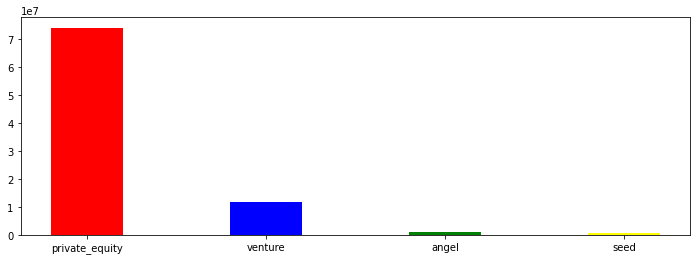

In [41]:
plt.figure(figsize=(12,4))
plt.bar(x.index,x.raised_amount_usd,width=0.4,
        color=['red','blue','green','yellow'])

In [42]:
# mf3=mf2[(mf2.raised_amount_usd>5000000) & 
#         (mf2.raised_amount_usd<15000000)&
#        (mf2.funding_round_type=='venture')]

mf3=mf2[(mf2.funding_round_type=='venture')]


# Checkpoints 3


In [43]:
# top9 countries which have received the highest total funding
pd.pivot_table(mf3,index='country_code',
               values='raised_amount_usd',
               aggfunc='sum').sort_values(by='raised_amount_usd',
                ascending=False)[:9].astype('int64')

,raised_amount_usd
country_code,
USA,420068029342
CHN,39338918773
GBR,20072813004
IND,14261508718
CAN,9482217668
FRA,7226851352
ISR,6854350477
DEU,6306921981
JPN,3167647127


In [44]:
# making dataframe named as top 9 for top9 countries
top9=mf3[(mf3.country_code=='USA') | (mf3.country_code=='CHN') | 
        (mf3.country_code=='GBR') | (mf3.country_code=='IND') | 
        (mf3.country_code=='CAN') | (mf3.country_code=='DEU') |
         (mf3.country_code=='ISR') | (mf3.country_code=='FRA') |
        (mf3.country_code=='NLD')] 

In [45]:
# eXporting CSV file to system so we can use this for further analysis
# top9.to_csv('top9.csv')

In [46]:
top9.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN
5,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN
7,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,operating,USA
8,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,operating,USA


In [47]:
# fetching the Wikipedia page for getting the list of english speaking countries
df=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language')

In [48]:
c3=df[0]
c3.head()

,Country,ISO code,Geographic region,Population1,Primary language?
0,Antigua and Barbuda,ATG,Caribbean,85000,Yes (English-based creole language)
1,The Bahamas[1],BHS,Caribbean,331000,Yes (English-based creole language)
2,Barbados[2],BRB,Caribbean,294000,Yes (English-based creole language)
3,Belize[3],BLZ,Central America,288000,Yes (English-based creole language)
4,Botswana[3],BWA,Africa,1882000,Yes


In [49]:
c3_1=df[1]
c3_1.head()

,Country,ISO code,Geographic region,Population1,Primary language?
0,Australia,AUS,Oceania,25795700,Yes
1,New Zealand[24],NZL,Oceania,4893830,Yes
2,United Kingdom,GBR,Europe,66040229,Yes
3,United States,USA,North America,328239523,Yes


In [50]:
c3['Primary language?'][2][:3] 

'Yes'

In [51]:
# to remove warnings message
import warnings
warnings.filterwarnings('ignore')

In [52]:
# slicing the string till 3rd index, so that out will be like Yes or NO only
for i in range(len(c3)):
    c3['Primary language?'][i]=c3['Primary language?'][i][:3]


In [53]:
c3.head()

,Country,ISO code,Geographic region,Population1,Primary language?
0,Antigua and Barbuda,ATG,Caribbean,85000,Yes
1,The Bahamas[1],BHS,Caribbean,331000,Yes
2,Barbados[2],BRB,Caribbean,294000,Yes
3,Belize[3],BLZ,Central America,288000,Yes
4,Botswana[3],BWA,Africa,1882000,Yes


In [54]:
# joining 2 tables together
language=c3.append(c3_1,ignore_index=True)

In [55]:
language.head()

,Country,ISO code,Geographic region,Population1,Primary language?
0,Antigua and Barbuda,ATG,Caribbean,85000,Yes
1,The Bahamas[1],BHS,Caribbean,331000,Yes
2,Barbados[2],BRB,Caribbean,294000,Yes
3,Belize[3],BLZ,Central America,288000,Yes
4,Botswana[3],BWA,Africa,1882000,Yes


In [56]:
# Merging the english speaking table and Top 9 countries together
a=pd.merge(top9,language,how='inner',left_on='country_code',right_on='ISO code')

In [57]:
# Dropping unecassary columns from the database
a.drop(['Country','ISO code','Geographic region','Population1'],axis=1,inplace=True)

In [58]:
# renaming the column
a.rename(columns={'Primary language?':'English'},inplace=True)

In [59]:
''' only 4 countries left from top 9 who understands or speaks english'''

' only 4 countries left from top 9 who understands or speaks english'

In [60]:
# changing language for India as , India also accept English language officially
a.loc[a.country_code=='IND','English']='Yes'

In [61]:
a.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,Yes
1,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,operating,IND,Yes
2,/organization/247-learning-private,venture,4000000.0,24x7 Learning,EdTech|Education|Systems,operating,IND,Yes
3,/organization/3dsoc,venture,1240000.0,3DSoC,3D|Mobile,operating,IND,Yes
4,/organization/3dsoc,venture,825000.0,3DSoC,3D|Mobile,operating,IND,Yes


In [62]:
# fetching only those countries who speaks English
# top9_E=a[a.English=='Yes']
top9_E=a

In [63]:
top9_E.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,Yes
1,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,operating,IND,Yes
2,/organization/247-learning-private,venture,4000000.0,24x7 Learning,EdTech|Education|Systems,operating,IND,Yes
3,/organization/3dsoc,venture,1240000.0,3DSoC,3D|Mobile,operating,IND,Yes
4,/organization/3dsoc,venture,825000.0,3DSoC,3D|Mobile,operating,IND,Yes


In [64]:
# top 3 english speaking countries from top 9 frame
pd.pivot_table(top9_E,index='country_code',
               values='raised_amount_usd', 
               aggfunc='sum').astype('int64').sort_values(by='raised_amount_usd',
                                                          ascending=False)[:4]

,raised_amount_usd
country_code,
USA,420068029342
GBR,20072813004
IND,14261508718
CAN,9482217668


# Checkpoint 4

In [65]:
top9_E.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,Yes
1,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,operating,IND,Yes
2,/organization/247-learning-private,venture,4000000.0,24x7 Learning,EdTech|Education|Systems,operating,IND,Yes
3,/organization/3dsoc,venture,1240000.0,3DSoC,3D|Mobile,operating,IND,Yes
4,/organization/3dsoc,venture,825000.0,3DSoC,3D|Mobile,operating,IND,Yes


In [66]:
top9_E['primary_sector']=np.nan

In [67]:
top9_E

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,Yes,NaN
1,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,operating,IND,Yes,NaN
2,/organization/247-learning-private,venture,4000000.0,24x7 Learning,EdTech|Education|Systems,operating,IND,Yes,NaN
3,/organization/3dsoc,venture,1240000.0,3DSoC,3D|Mobile,operating,IND,Yes,NaN
4,/organization/3dsoc,venture,825000.0,3DSoC,3D|Mobile,operating,IND,Yes,NaN
...,...,...,...,...,...,...,...,...,...
40044,/organization/zubka,venture,3919186.0,Zubka,Consulting,closed,GBR,Yes,NaN
40045,/organization/zutux,venture,1503926.0,Zutux,E-Commerce|Furniture,operating,GBR,Yes,NaN
40046,/organization/zyncd,venture,144451.0,Zyncd,Crowdsourcing|Knowledge Management,operating,GBR,Yes,NaN
40047,/organization/zynstra,venture,8400000.0,Zynstra,Software,operating,GBR,Yes,NaN


In [68]:
# splitting the category list and fetching only first occuring string as primary
for i in range(len(top9_E)):
    
    top9_E['primary_sector'][i]=top9_E['category_list'][i].split('|')[0].lower()


In [69]:
top9_E.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,Yes,media
1,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,operating,IND,Yes,e-commerce
2,/organization/247-learning-private,venture,4000000.0,24x7 Learning,EdTech|Education|Systems,operating,IND,Yes,edtech
3,/organization/3dsoc,venture,1240000.0,3DSoC,3D|Mobile,operating,IND,Yes,3d
4,/organization/3dsoc,venture,825000.0,3DSoC,3D|Mobile,operating,IND,Yes,3d


In [70]:
#loading the mapping csv file
map_file=pd.read_csv('mapping.csv')
map_file.dropna(inplace=True)

In [71]:
def mapping(x):
    if x['Automotive & Sports']==1:
        return 'Automotive & sports'
    if x['Blanks']:
        return 'Blanks'
    if x['Cleantech / Semiconductors']==1:
        return 'Cleantech / Semiconductors'
    if x['Entertainment'] == 1:
        return 'Entertainment'
    if x['Health'] ==1:
        return 'Health'
    if x['Manufacturing']==1:
        return 'Manufacturing'
    if x['News, Search and Messaging']==1:
        return 'News, Search and Messaging'
    if x['Others']==1:
        return 'Others'
    if x['Social, Finance, Analytics, Advertising']==1:
        return 'Social, Finance, Analytics, Advertising'


In [72]:
main_sector=map_file.apply(lambda x:str(mapping(x)),axis=1)

In [73]:
primary_sector = map_file['category_list'].str.lower()

In [74]:
primary_sector

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

In [75]:
main_sector

1                                Manufacturing
2                                Manufacturing
3                                Manufacturing
4      Social, Finance, Analytics, Advertising
5                                       Health
                        ...                   
683                                     Others
684                              Entertainment
685                              Entertainment
686                                     Others
687                                     Others
Length: 687, dtype: object

In [76]:
v=pd.DataFrame({'primary_sector':primary_sector.values,
                'main_sector':main_sector.values})
v.head()

,primary_sector,main_sector
0,3d,Manufacturing
1,3d printing,Manufacturing
2,3d technology,Manufacturing
3,accounting,"Social, Finance, Analytics, Advertising"
4,active lifestyle,Health


In [77]:
v

,primary_sector,main_sector
0,3d,Manufacturing
1,3d printing,Manufacturing
2,3d technology,Manufacturing
3,accounting,"Social, Finance, Analytics, Advertising"
4,active lifestyle,Health
...,...,...
682,wholesale,Others
683,wine and spirits,Entertainment
684,wireless,Entertainment
685,women,Others


In [78]:
#merging top 9 dataframe with main sector
vt=pd.merge(top9_E,v,how='inner',on='primary_sector')

In [79]:
vt

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English,primary_sector,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,Yes,media,Entertainment
1,/organization/manas-informatics,venture,160000.0,Manas Informatic,Media|News,operating,IND,Yes,media,Entertainment
2,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,operating,USA,Yes,media,Entertainment
3,/organization/audiosocket,venture,650000.0,Audiosocket,Media|Music|Technology,operating,USA,Yes,media,Entertainment
4,/organization/audiosocket,venture,750000.0,Audiosocket,Media|Music|Technology,operating,USA,Yes,media,Entertainment
...,...,...,...,...,...,...,...,...,...,...
37358,/organization/amirite,venture,2500000.0,Amirite.com,Estimation and Quoting|Opinions|Social Media|S...,operating,GBR,Yes,estimation and quoting,"Social, Finance, Analytics, Advertising"
37359,/organization/cloudblocks,venture,22414.0,Cloud 66,IaaS|PaaS|SaaS|Software,operating,GBR,Yes,iaas,Others
37360,/organization/decisionsim,venture,1850000.0,DecisionSim,Online Education|Services|Training,operating,GBR,Yes,online education,Others
37361,/organization/skin-analytics,venture,100000.0,Skin Analytics,mHealth|Mobile,operating,GBR,Yes,mhealth,Health


# Checkpoint 5

In [80]:
d=vt

In [81]:
# fetching data for individual country in each dataframe name as D1,D2,D3
D1=d[d.country_code=='USA']
D2=d[d.country_code=='GBR']
D3=d[d.country_code=='IND']

In [82]:
D1.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English,primary_sector,main_sector
2,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,operating,USA,Yes,media,Entertainment
3,/organization/audiosocket,venture,650000.0,Audiosocket,Media|Music|Technology,operating,USA,Yes,media,Entertainment
4,/organization/audiosocket,venture,750000.0,Audiosocket,Media|Music|Technology,operating,USA,Yes,media,Entertainment
5,/organization/audiosocket,venture,1582300.0,Audiosocket,Media|Music|Technology,operating,USA,Yes,media,Entertainment
6,/organization/babble,venture,2000000.0,Babble,Media|News|Parenting,acquired,USA,Yes,media,Entertainment


In [83]:
# count of inverstements in USA
pd.pivot_table(D1,index='main_sector',values='raised_amount_usd',
               aggfunc='count',
               margins=True).sort_values(by='raised_amount_usd')

,raised_amount_usd
main_sector,
Automotive & sports,505
Entertainment,1756
Manufacturing,2453
Health,3263
"News, Search and Messaging",4301
"Social, Finance, Analytics, Advertising",5156
Cleantech / Semiconductors,7849
Others,8243
All,33526


In [84]:
# count of investments in GBR (Great Britian)
pd.pivot_table(D2,index='main_sector',values='raised_amount_usd',
               aggfunc='count',
               margins=True).sort_values(by='raised_amount_usd')

,raised_amount_usd
main_sector,
Automotive & sports,44
Health,118
Manufacturing,122
Entertainment,133
"News, Search and Messaging",241
"Social, Finance, Analytics, Advertising",318
Cleantech / Semiconductors,433
Others,507
All,1916


In [85]:
# count of investment in India
pd.pivot_table(D3,index='main_sector',values='raised_amount_usd',
               aggfunc='count',
               margins=True).sort_values(by='raised_amount_usd')

,raised_amount_usd
main_sector,
Automotive & sports,31
Health,42
Cleantech / Semiconductors,54
Manufacturing,55
Entertainment,75
"Social, Finance, Analytics, Advertising",77
"News, Search and Messaging",130
Others,281
All,745


In [86]:
# amount raised sector wise in USA
pd.pivot_table(D1,index='main_sector',values='raised_amount_usd',
               aggfunc='sum',
               margins=True).sort_values(by='raised_amount_usd').astype('int64')

,raised_amount_usd
main_sector,
Automotive & sports,11632164696
Entertainment,16567831138
Manufacturing,24845319470
Health,31660933966
"News, Search and Messaging",44619319292
"Social, Finance, Analytics, Advertising",62062992808
Others,82084578045
Cleantech / Semiconductors,118764441980
All,392237581395


In [87]:
# amount raised sector wise in GBR
pd.pivot_table(D2,index='main_sector',values='raised_amount_usd',
               aggfunc='sum',
               margins=True).sort_values(by='raised_amount_usd').astype('int64')

,raised_amount_usd
main_sector,
Automotive & sports,480878712
Manufacturing,1019283214
Health,1046654806
Entertainment,1141281250
"Social, Finance, Analytics, Advertising",2851116278
"News, Search and Messaging",2956023749
Others,4400423043
Cleantech / Semiconductors,5028729267
All,18924390319


In [88]:
# amount raised sector wise in India
pd.pivot_table(D3,index='main_sector',values='raised_amount_usd',
               aggfunc='sum',
               margins=True).sort_values(by='raised_amount_usd').astype('int64')

,raised_amount_usd
main_sector,
Health,564370000
Manufacturing,730260000
Cleantech / Semiconductors,786444633
"Social, Finance, Analytics, Advertising",866763870
Entertainment,975705344
Automotive & sports,1556350000
"News, Search and Messaging",1739579948
Others,6318507440
All,13537981235


In [89]:
x13=D1[D1.main_sector=='Cleantech / Semiconductors']

In [90]:
x13.sort_values(by='raised_amount_usd',ascending=False)[:1]

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English,primary_sector,main_sector
22434,/organization/freescale,venture,1.760000e+10,Freescale Semiconductor,Semiconductors,ipo,USA,Yes,semiconductors,Cleantech / Semiconductors


In [91]:
x13=D2[D2.main_sector=='Cleantech / Semiconductors']

In [92]:
x13.sort_values(by='raised_amount_usd',ascending=False)[:1]

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English,primary_sector,main_sector
18890,/organization/immunocore,venture,320000000.0,Immunocore,Biotechnology|Market Research,operating,GBR,Yes,biotechnology,Cleantech / Semiconductors


In [93]:
x13=D3[D3.main_sector=='Cleantech / Semiconductors']

In [94]:
x13.sort_values(by='raised_amount_usd',ascending=False)[:1]

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English,primary_sector,main_sector
1380,/organization/capturesolar-energy,venture,125000000.0,CaptureSolar Energy,Energy|Environmental Innovation|Renewable Ener...,operating,IND,Yes,energy,Cleantech / Semiconductors


In [95]:
x14=D3[D3.main_sector=='Social, Finance, Analytics, Advertising']

In [96]:
x14.sort_values(by='raised_amount_usd',ascending=False)[:1]

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English,primary_sector,main_sector
1588,/organization/shopclues-com,venture,100000000.0,ShopClues.com,Consumer Internet|E-Commerce|Shopping,operating,IND,Yes,consumer internet,"Social, Finance, Analytics, Advertising"


In [97]:
top9_E.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,Yes,media
1,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,operating,IND,Yes,e-commerce
2,/organization/247-learning-private,venture,4000000.0,24x7 Learning,EdTech|Education|Systems,operating,IND,Yes,edtech
3,/organization/3dsoc,venture,1240000.0,3DSoC,3D|Mobile,operating,IND,Yes,3d
4,/organization/3dsoc,venture,825000.0,3DSoC,3D|Mobile,operating,IND,Yes,3d


In [98]:
top9_E.country_code.unique()

array(['IND', 'CAN', 'USA', 'GBR'], dtype=object)

# after finding insights trying to build a model and deploying it 

In [99]:
df=vt.copy()

In [100]:
df['raised_amount_usd']=round(df['raised_amount_usd']/1000000,2)

In [101]:
df.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English,primary_sector,main_sector
0,/organization/-fame,venture,10.00,#fame,Media,operating,IND,Yes,media,Entertainment
1,/organization/manas-informatics,venture,0.16,Manas Informatic,Media|News,operating,IND,Yes,media,Entertainment
2,/organization/all-def-digital,venture,5.00,All Def Digital,Media,operating,USA,Yes,media,Entertainment
3,/organization/audiosocket,venture,0.65,Audiosocket,Media|Music|Technology,operating,USA,Yes,media,Entertainment
4,/organization/audiosocket,venture,0.75,Audiosocket,Media|Music|Technology,operating,USA,Yes,media,Entertainment


In [102]:
df.drop(['permalink','name','category_list','English','primary_sector'],axis=1,inplace=True)

In [103]:
df.drop(['funding_round_type','status'],inplace=True,axis=1)

In [104]:
df.head()

,raised_amount_usd,country_code,main_sector
0,10.00,IND,Entertainment
1,0.16,IND,Entertainment
2,5.00,USA,Entertainment
3,0.65,USA,Entertainment
4,0.75,USA,Entertainment


In [105]:
df.main_sector.value_counts()

Others                                     9357
Cleantech / Semiconductors                 8665
Social, Finance, Analytics, Advertising    5715
News, Search and Messaging                 4804
Health                                     3484
Manufacturing                              2730
Entertainment                              2014
Automotive & sports                         594
Name: main_sector, dtype: int64

In [106]:
df1=pd.get_dummies(df,['country_code','main_sector'])

In [107]:
x=df1.drop('raised_amount_usd',axis=1)
y=df1['raised_amount_usd']

In [108]:
x

,country_code_CAN,country_code_GBR,country_code_IND,country_code_USA,main_sector_Automotive & sports,main_sector_Cleantech / Semiconductors,main_sector_Entertainment,main_sector_Health,main_sector_Manufacturing,"main_sector_News, Search and Messaging",main_sector_Others,"main_sector_Social, Finance, Analytics, Advertising"
0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37358,0,1,0,0,0,0,0,0,0,0,0,1
37359,0,1,0,0,0,0,0,0,0,0,1,0
37360,0,1,0,0,0,0,0,0,0,0,1,0
37361,0,1,0,0,0,0,0,1,0,0,0,0


In [109]:
y

0        10.00
1         0.16
2         5.00
3         0.65
4         0.75
         ...  
37358     2.50
37359     0.02
37360     1.85
37361     0.10
37362     5.00
Name: raised_amount_usd, Length: 37363, dtype: float64

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [112]:
x_train

,country_code_CAN,country_code_GBR,country_code_IND,country_code_USA,main_sector_Automotive & sports,main_sector_Cleantech / Semiconductors,main_sector_Entertainment,main_sector_Health,main_sector_Manufacturing,"main_sector_News, Search and Messaging",main_sector_Others,"main_sector_Social, Finance, Analytics, Advertising"
25277,0,0,0,1,0,0,1,0,0,0,0,0
2114,0,0,0,1,0,0,0,0,1,0,0,0
26215,0,0,0,1,0,0,0,0,0,1,0,0
30014,0,0,0,1,0,0,0,0,0,1,0,0
25249,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12363,0,0,0,1,0,0,0,0,0,0,1,0
5695,0,0,0,1,0,0,0,0,0,0,1,0
8006,0,0,0,1,0,0,0,0,0,0,1,0
17745,0,0,0,1,0,1,0,0,0,0,0,0


In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
df1

,raised_amount_usd,country_code_CAN,country_code_GBR,country_code_IND,country_code_USA,main_sector_Automotive & sports,main_sector_Cleantech / Semiconductors,main_sector_Entertainment,main_sector_Health,main_sector_Manufacturing,"main_sector_News, Search and Messaging",main_sector_Others,"main_sector_Social, Finance, Analytics, Advertising"
0,10.00,0,0,1,0,0,0,1,0,0,0,0,0
1,0.16,0,0,1,0,0,0,1,0,0,0,0,0
2,5.00,0,0,0,1,0,0,1,0,0,0,0,0
3,0.65,0,0,0,1,0,0,1,0,0,0,0,0
4,0.75,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37358,2.50,0,1,0,0,0,0,0,0,0,0,0,1
37359,0.02,0,1,0,0,0,0,0,0,0,0,1,0
37360,1.85,0,1,0,0,0,0,0,0,0,0,1,0
37361,0.10,0,1,0,0,0,0,0,1,0,0,0,0


In [115]:
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,mean_squared_error

In [116]:
linear= LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
MSE= mean_squared_error(y_test,y_pred)
MSE

595.8667076631472

In [117]:
x_test[:1]

,country_code_CAN,country_code_GBR,country_code_IND,country_code_USA,main_sector_Automotive & sports,main_sector_Cleantech / Semiconductors,main_sector_Entertainment,main_sector_Health,main_sector_Manufacturing,"main_sector_News, Search and Messaging",main_sector_Others,"main_sector_Social, Finance, Analytics, Advertising"
19372,0,0,0,1,0,0,0,0,0,1,0,0


In [118]:
linear.predict([[0,0,0,1,0,0,0,0,0,1,0,0]])[0]

10.55859375

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
MSE= mean_squared_error(y_test,y_pred)
MSE

597.354540092855

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
dtc= DecisionTreeRegressor()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
MSE= mean_squared_error(y_test,y_pred)
MSE

596.4994139101997

In [124]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [136]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
MSE= mean_squared_error(y_test,y_pred)
MSE


1261.3140592383247

In [119]:
return d sadfsd

SyntaxError: invalid syntax (Temp/ipykernel_1984/506205981.py, line 1)

## Exporting our Model with the help of pickle to Deploy

In [140]:
import pickle

In [ ]:
pickle.dump(linear,open('linear_model.sav','wb'))


In [139]:
p_model=pickle.load(open('linear_model.sav','rb'))

NameError: name 'pickle' is not defined

In [ ]:
p_model.predict([[0,0,0,1,0,0,0,0,0,1,0,0]])

# Extra Work


# Pickling and unpickling

In [ ]:
return zzzsd

In [ ]:
import pickle

In [ ]:
pickle.dump(linear,open('trained_model.sav','wb'))


In [ ]:
p_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
p_model.predict([[ 
       -0.18127942, -0.23202962, -0.14239314,  0.33845226, -0.12869707,
       -0.54944151, -0.24039757, -0.32168521, -0.28076269,  2.61043657,
       -0.5760883 , -0.42533456]])[0]

In [ ]:
# pip install streamlit

In [ ]:
loaded_model=pickle.load(open('deploy/trained_model.sav','rb'))

In [ ]:
loaded_model.predict([[0., -0.44550684, -0.2683613 , -0.2382881 ,  0.63369988,
       -0.18127942, -0.23202962, -0.14239314,  0.33845226, -0.12869707,
       -0.54944151, -0.24039757, -0.32168521, -0.28076269,  2.61043657,
       -0.5760883 , -0.42533456]])[0]

In [ ]:
x_test.columns

In [ ]:
x_test.shape

In [ ]:
df1=vt.copy()
df1.head()

In [ ]:
df1.drop(['permalink','funding_round_type','name',
          'category_list','English','primary_sector'],
         axis=1,inplace=True)

In [ ]:
df1.head()

In [ ]:
df1['raised_amount_usd']=(df1['raised_amount_usd']/1000000).round(3)

In [ ]:
df1.head()

In [ ]:
from sklearn import preprocessing


In [ ]:
se=preprocessing.LabelEncoder()
se.fit(df1.status)
print(se.classes_)
df1.status=se.transform(df1.status)

In [ ]:
df1

In [ ]:
se.fit(df1.country_code)
print(se.classes_)
df1.country_code=se.transform(df1.country_code)

In [ ]:
se.fit(df1.main_sector)
print(se.classes_)
df1.main_sector=se.transform(df1.main_sector)

In [ ]:
df1.head()

In [ ]:
def add(a,b):
    c=a+b
    return c,'hello',c

In [ ]:
add(2,3)